In [3]:
import pandas as pd
# Load the uploaded datasets
customers_file = "C:/Users/Eshwar/Downloads/Customers.csv"
products_file = "C:/Users/Eshwar/Downloads/Products.csv"
transactions_file = "C:/Users/Eshwar/Downloads/Transactions.csv"

# Read the datasets
customers_df = pd.read_csv(customers_file)
products_df = pd.read_csv(products_file)
transactions_df = pd.read_csv(transactions_file)

# Display basic information about each dataset to ensure they are loaded correctly
customers_info = customers_df.info()
products_info = products_df.info()
transactions_info = transactions_df.info()

customers_head = customers_df.head()
products_head = products_df.head()
transactions_head = transactions_df.head()

(customers_info, customers_head, products_info, products_head, transactions_info, transactions_head)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


(None,
   CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
 None,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
 None,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  20

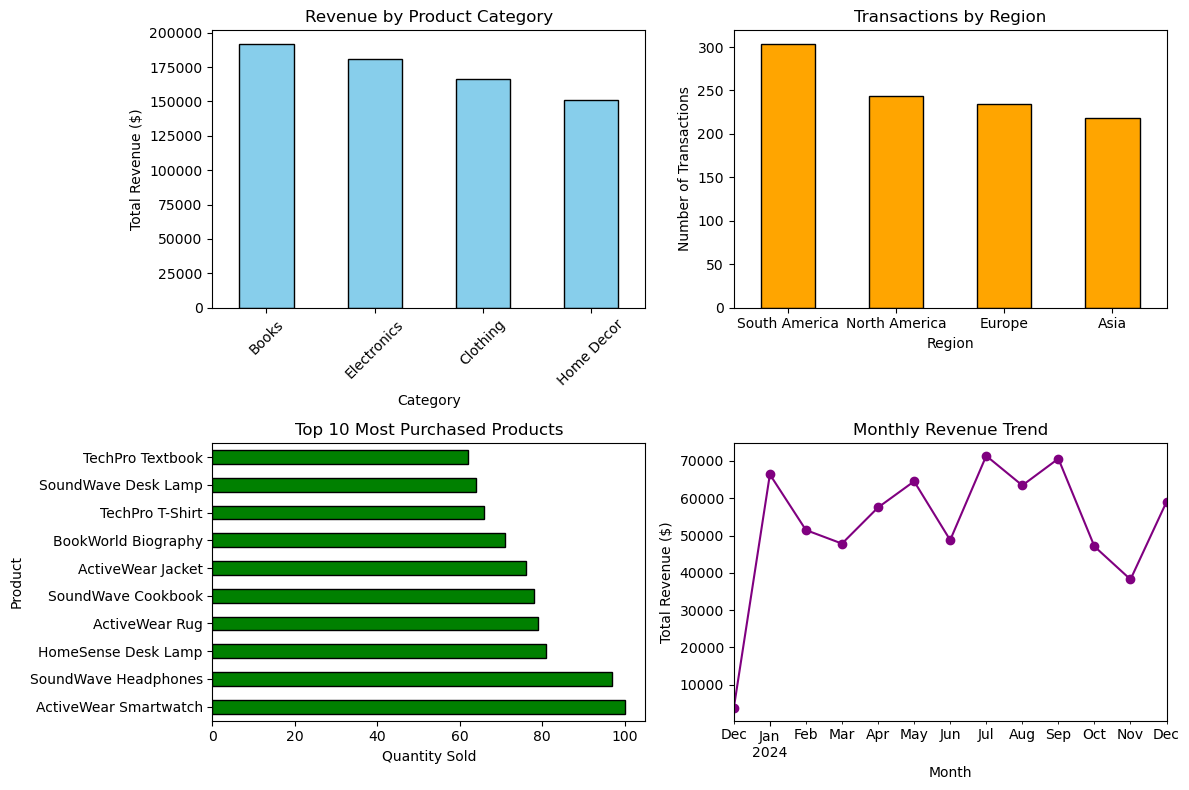

(          Quantity   TotalValue     Price_x     Price_y
 count  1000.000000  1000.000000  1000.00000  1000.00000
 mean      2.537000   689.995560   272.55407   272.55407
 std       1.117981   493.144478   140.73639   140.73639
 min       1.000000    16.080000    16.08000    16.08000
 25%       2.000000   295.295000   147.95000   147.95000
 50%       3.000000   588.880000   299.93000   299.93000
 75%       4.000000  1011.660000   404.40000   404.40000
 max       4.000000  1991.040000   497.76000   497.76000,
 TransactionID      0
 CustomerID         0
 ProductID          0
 TransactionDate    0
 Quantity           0
 TotalValue         0
 Price_x            0
 CustomerName       0
 Region             0
 SignupDate         0
 ProductName        0
 Category           0
 Price_y            0
 dtype: int64,
 Category
 Books          192147.47
 Electronics    180783.50
 Clothing       166170.66
 Home Decor     150893.93
 Name: TotalValue, dtype: float64,
 ProductName
 ActiveWear Smartwatch 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date columns to datetime format for analysis
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Merge datasets for comprehensive analysis
merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

# Summary statistics for numerical columns
summary_statistics = merged_df.describe()

# Check for missing values
missing_values = merged_df.isnull().sum()

# Distribution of transactions over regions
region_distribution = merged_df['Region'].value_counts()

# Total revenue per product category
revenue_per_category = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Most purchased products
most_purchased_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)

# Time series analysis: Monthly transaction trends
merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_trends = merged_df.groupby('TransactionMonth')['TotalValue'].sum()

# Visualizations
plt.figure(figsize=(12, 8))

# Plotting revenue per category
plt.subplot(2, 2, 1)
revenue_per_category.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)

# Plotting region distribution
plt.subplot(2, 2, 2)
region_distribution.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Transactions by Region")
plt.xlabel("Region")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)

# Plotting most purchased products
plt.subplot(2, 2, 3)
most_purchased_products.head(10).plot(kind='barh', color='green', edgecolor='black')
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product")

# Plotting monthly trends
plt.subplot(2, 2, 4)
monthly_trends.plot(kind='line', marker='o', color='purple')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")

plt.tight_layout()
plt.show()

(summary_statistics, missing_values, revenue_per_category, most_purchased_products.head(10), monthly_trends.tail(5))


In [5]:
import pandas as pd

# Merge datasets for comprehensive analysis
merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

# 1. Dominance of the Books Category
revenue_per_category = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Category:")
print(revenue_per_category)

# 2. Seasonal Trends in Revenue
merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_df.groupby('TransactionMonth')['TotalValue'].sum().sort_values(ascending=False)
print("\nMonthly Revenue:")
print(monthly_revenue)

# 3. Top-Selling Products
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop-Selling Products:")
print(top_products)

# 4. Regional Sales Opportunities
region_sales = merged_df['Region'].value_counts()
print("\nTransactions by Region:")
print(region_sales)

# 5. Customer Engagement Based on Signup Date
merged_df['SignupYear'] = merged_df['SignupDate'].dt.year
revenue_by_signup_year = merged_df.groupby('SignupYear')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Signup Year:")
print(revenue_by_signup_year)


Revenue by Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64

Monthly Revenue:
TransactionMonth
2024-07    71366.39
2024-09    70603.75
2024-01    66376.39
2024-05    64527.74
2024-08    63436.74
2024-12    59049.20
2024-04    57519.06
2024-02    51459.27
2024-06    48771.18
2024-03    47828.73
2024-10    47063.22
2024-11    38224.37
2023-12     3769.52
Freq: M, Name: TotalValue, dtype: float64

Top-Selling Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64

Transactions by Region:
South America    304
North America    244
Europe           234
Asia             218
Name: Region, dtype: int64

Revenue b

In [6]:
# Check for missing values in each dataset
print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(transactions_df.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


Revenue by Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


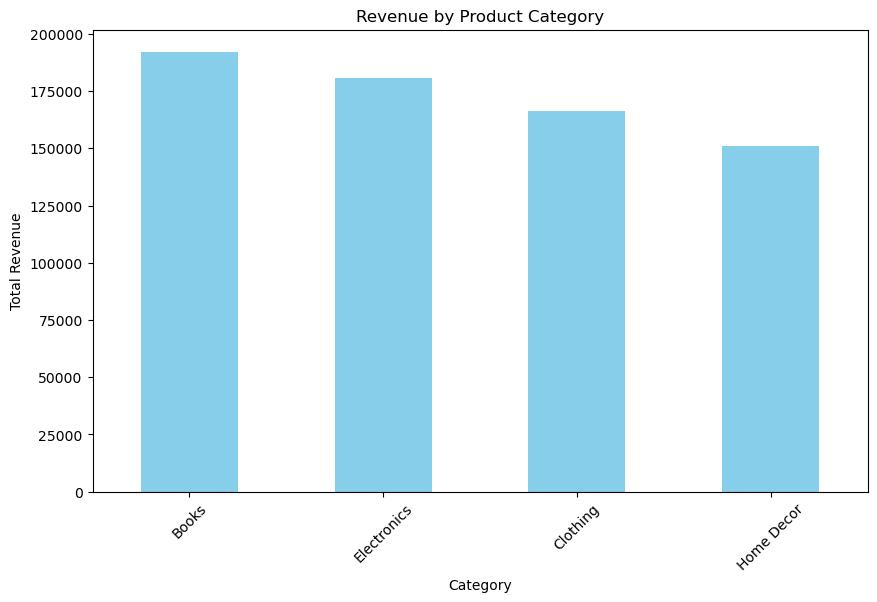

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
customers_file = "C:/Users/Eshwar/Downloads/Customers.csv"
products_file = "C:/Users/Eshwar/Downloads/Products.csv"
transactions_file = "C:/Users/Eshwar/Downloads/Transactions.csv"

customers_df = pd.read_csv(customers_file)
products_df = pd.read_csv(products_file)
transactions_df = pd.read_csv(transactions_file)

# Merge datasets
merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

# Insight 1: Revenue by Category
category_revenue = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Category:")
print(category_revenue)

# Plotting the Revenue by Category
plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


Top-Selling Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


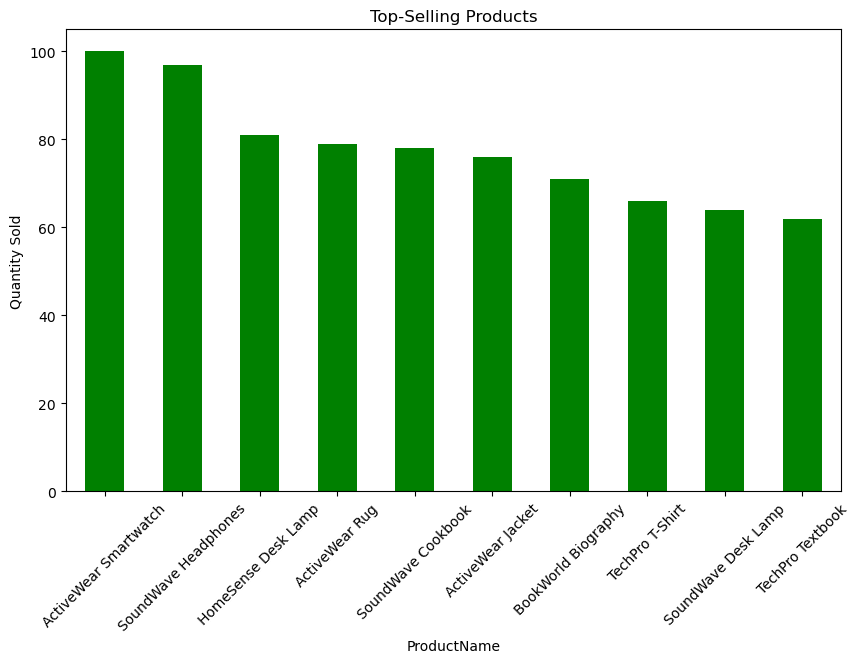

In [9]:
# Insight 2: Top-Selling Products
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top-Selling Products:")
print(top_products)

# Plotting the Top-Selling Products
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='green')
plt.title('Top-Selling Products')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()


Monthly Revenue:
TransactionMonth
2024-07    71366.39
2024-09    70603.75
2024-01    66376.39
2024-05    64527.74
2024-08    63436.74
2024-12    59049.20
2024-04    57519.06
2024-02    51459.27
2024-06    48771.18
2024-03    47828.73
2024-10    47063.22
2024-11    38224.37
2023-12     3769.52
Freq: M, Name: TotalValue, dtype: float64


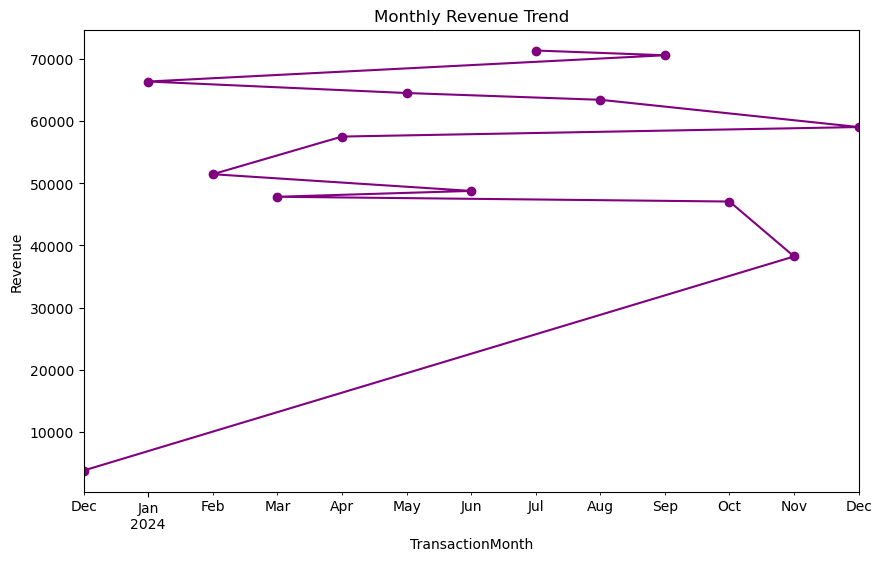

In [10]:
# Convert transaction date to datetime
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])

# Extract month and year from the transaction date
merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.to_period('M')

# Insight 3: Monthly Revenue Trends
monthly_revenue = merged_df.groupby('TransactionMonth')['TotalValue'].sum().sort_values(ascending=False)
print("Monthly Revenue:")
print(monthly_revenue)

# Plotting the Monthly Revenue Trend
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.show()


Revenue by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


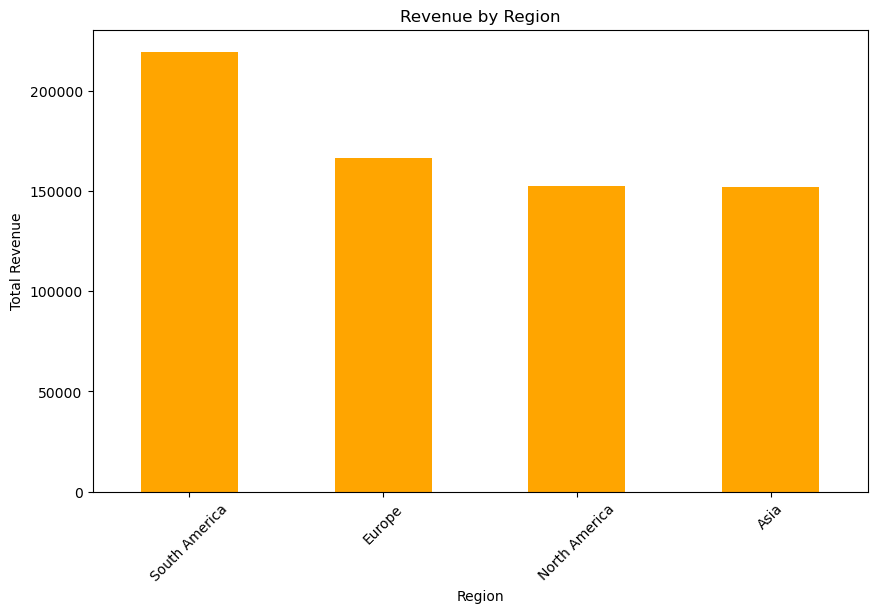

In [11]:
# Insight 4: Regional Sales Insights
region_revenue = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Region:")
print(region_revenue)

# Plotting the Revenue by Region
plt.figure(figsize=(10, 6))
region_revenue.plot(kind='bar', color='orange')
plt.title('Revenue by Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


Revenue by Signup Year:
SignupYear
2024    267361.51
2022    225840.04
2023    196794.01
Name: TotalValue, dtype: float64


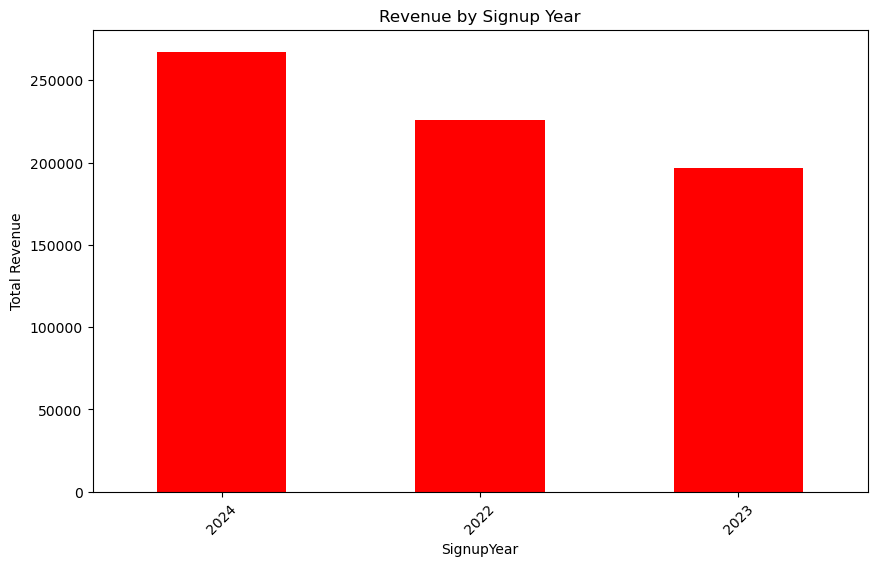

In [12]:
# Extract signup year from the signup date
merged_df['SignupYear'] = pd.to_datetime(merged_df['SignupDate']).dt.year

# Insight 5: Customer Engagement by Signup Year
signup_year_revenue = merged_df.groupby('SignupYear')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Signup Year:")
print(signup_year_revenue)

# Plotting the Revenue by Signup Year
plt.figure(figsize=(10, 6))
signup_year_revenue.plot(kind='bar', color='red')
plt.title('Revenue by Signup Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

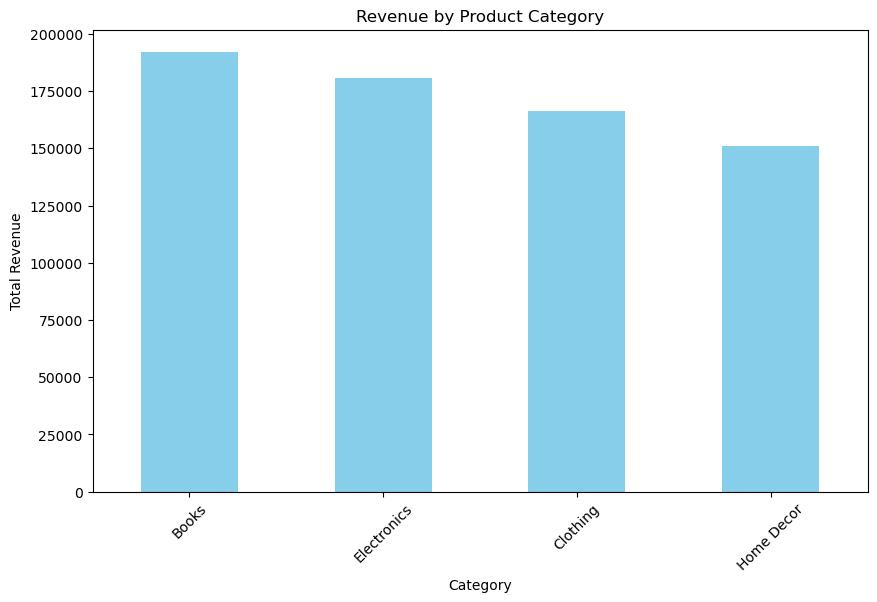

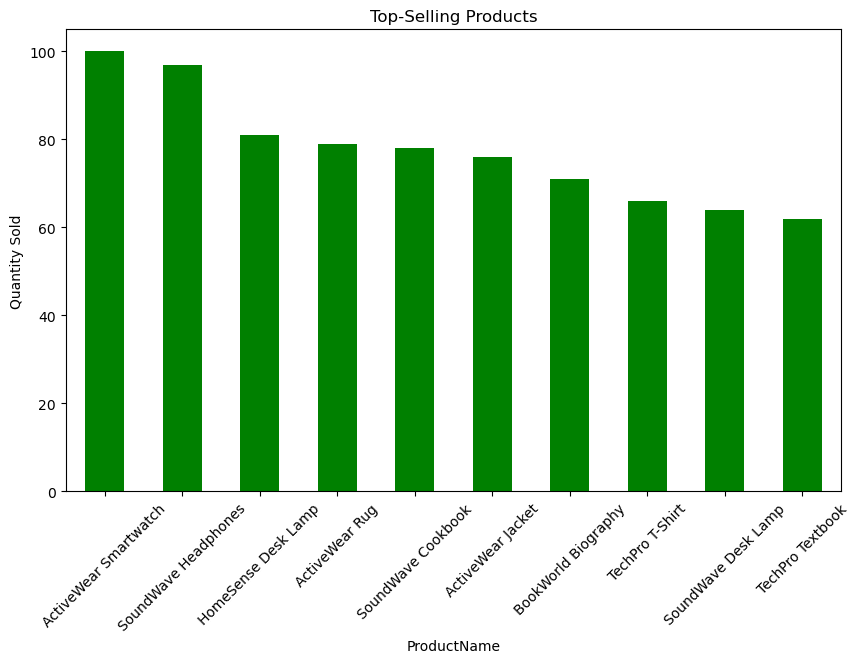

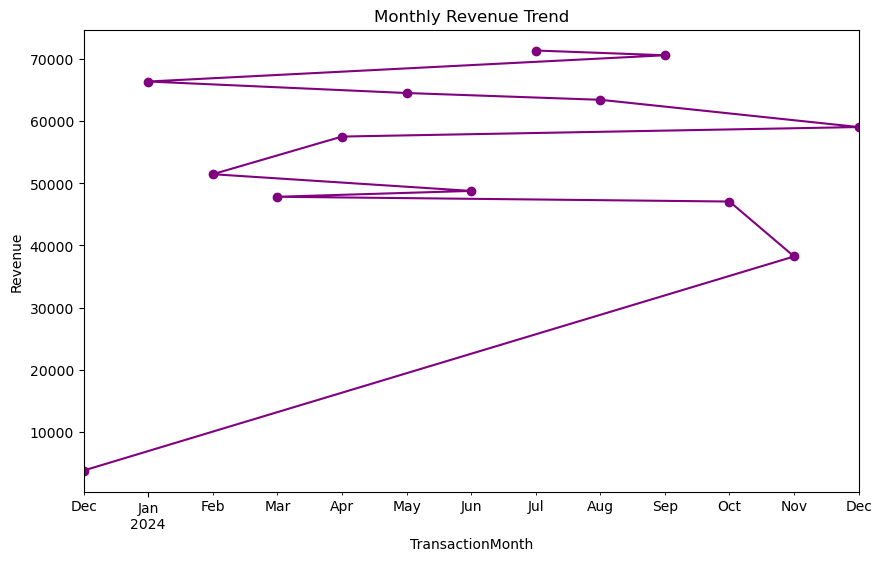

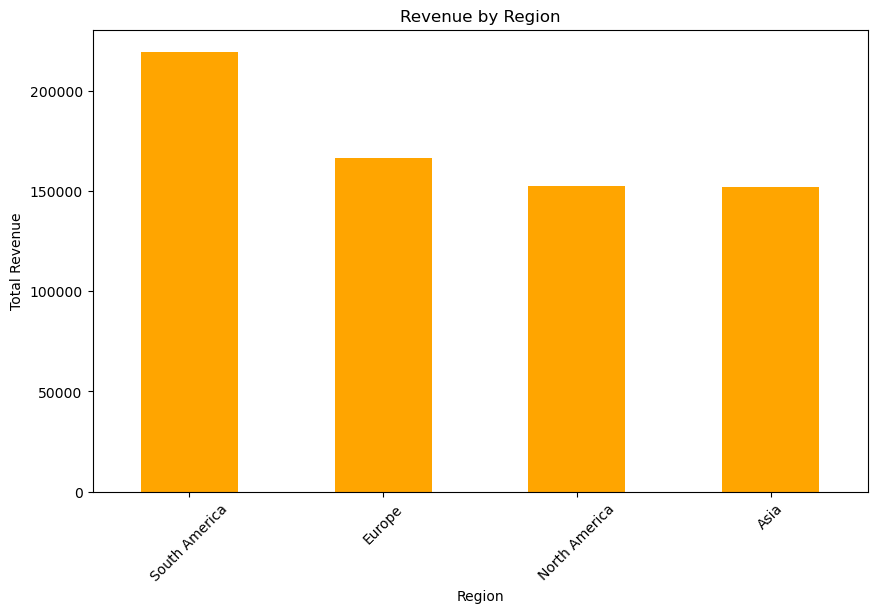

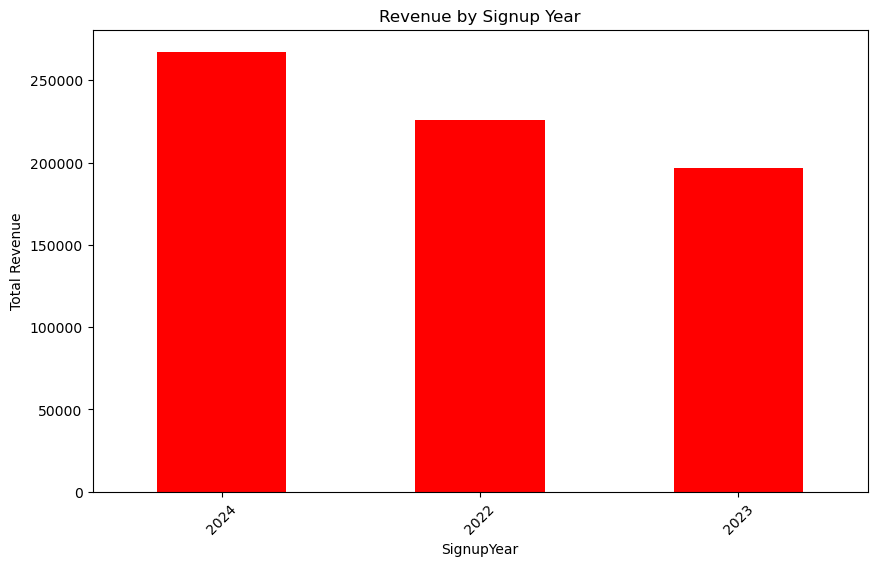

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
customers_file = "C:/Users/Eshwar/Downloads/Customers.csv"
products_file = "C:/Users/Eshwar/Downloads/Products.csv"
transactions_file = "C:/Users/Eshwar/Downloads/Transactions.csv"

customers_df = pd.read_csv(customers_file)
products_df = pd.read_csv(products_file)
transactions_df = pd.read_csv(transactions_file)

# Merge datasets for comprehensive analysis
merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

# Display the first few rows of the merged dataset
print(merged_df.head())

# Step 1: Check for Missing Values
print("\nMissing Values:")
print(merged_df.isnull().sum())

# Step 2: Descriptive Statistics
print("\nDescriptive Statistics:")
print(merged_df.describe())

# Step 3: Revenue by Category
category_revenue = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Category:")
print(category_revenue)

# Step 4: Top-Selling Products
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop-Selling Products:")
print(top_products)

# Step 5: Monthly Revenue Trends
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_df.groupby('TransactionMonth')['TotalValue'].sum().sort_values(ascending=False)
print("\nMonthly Revenue:")
print(monthly_revenue)

# Step 6: Revenue by Region
region_revenue = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Region:")
print(region_revenue)

# Step 7: Revenue by Signup Year
merged_df['SignupYear'] = pd.to_datetime(merged_df['SignupDate']).dt.year
signup_year_revenue = merged_df.groupby('SignupYear')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Signup Year:")
print(signup_year_revenue)

# Visualizations

# 1. Revenue by Category
plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# 2. Top-Selling Products
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='green')
plt.title('Top-Selling Products')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# 3. Monthly Revenue Trend
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.show()

# 4. Revenue by Region
plt.figure(figsize=(10, 6))
region_revenue.plot(kind='bar', color='orange')
plt.title('Revenue by Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# 5. Revenue by Signup Year
plt.figure(figsize=(10, 6))
signup_year_revenue.plot(kind='bar', color='red')
plt.title('Revenue by Signup Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()
